<a href="https://colab.research.google.com/github/Karagiannis-Giorg/A-new-perspective-to-Smart-Fridges/blob/main/Level_2/Val_%26_Pre_level2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive

drive.mount('/content/gdrive')

ROOT_DIR = '/content/gdrive/My Drive/Georgios_Karagiannis/Code'

!pip install ultralytics==8.3.40

Mounted at /content/gdrive
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 898.5/898.5 kB 52.5 MB/s eta 0:00:00


In [ ]:
!pip install roboflow

from roboflow import Roboflow
rf = Roboflow(api_key="jrkIR8tZdg5Y8uIaKmwZ")
project = rf.workspace("smart-fridge-jvm9v").project("smart-fridge-p5rw0")
version = project.version(9)
dataset = version.download("yolov11")

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.5/81.5 kB 4.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 2.4 MB/s eta 0:00:00
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10
loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Smart-Fridge-9 in yolov11:: 100%|██████████| 2346/2346 [00:00<00:00, 5450.07it/s]


In [ ]:
import os
import cv2  # Import OpenCV for image processing
from ultralytics import YOLO

# Load a model
model = YOLO(os.path.join(ROOT_DIR, "Level2_train/detect/train/weights/best.pt"))


# Validate the model
metrics = model.val(data="/content/Smart-Fridge-9/data.yaml")
metrics.box.map  # map50-95
metrics.box.map50  # map50
metrics.box.map75  # map75
metrics.box.maps  # a list contains map50-95 of each category

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.
Ultralytics 8.3.40 🚀 Python-3.10.12 torch-2.5.1+cu121 CUDA:0 (Tesla T4, 15102MiB)
YOLO11n summary (fused): 238 layers, 2,582,932 parameters, 0 gradients, 6.3 GFLOPs


100%|██████████| 755k/755k [00:00<00:00, 22.4MB/s]
val: Scanning /content/Smart-Fridge-9/valid/labels... 135 images, 0 backgrounds, 0 corrupt: 100%|██████████| 135/135 [00:00<00:00, 1221.25it/s]

val: New cache created: /content/Smart-Fridge-9/valid/labels.cache



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 9/9 [00:04<00:00,  1.82it/s]


                   all        135        138      0.933      0.997       0.99      0.944
             half-ripe         30         30      0.907          1      0.987      0.937
             over-ripe         13         13      0.916          1      0.995      0.919
                  ripe         22         22      0.996          1      0.995      0.978
                unripe         73         73      0.911      0.987      0.984      0.942
Speed: 2.1ms preprocess, 7.9ms inference, 0.0ms loss, 9.3ms postprocess per image
Results saved to runs/detect/val


array([    0.93713,     0.91933,     0.97835,     0.94207])

In [ ]:
print("Average precision:", metrics.box.ap)
print("Average precision at IoU=0.50:", metrics.box.ap50)
print("Precision:", metrics.box.p)
print("Recall:", metrics.box.r)
print("F1 score:", metrics.box.f1)

Average precision: [    0.93713     0.91933     0.97835     0.94207]
Average precision at IoU=0.50: [    0.98689       0.995       0.995     0.98419]
Precision: [    0.90729     0.91604      0.9961     0.91141]
Recall: [          1           1           1     0.98653]
F1 score: [    0.95139     0.95618     0.99805     0.94748]


In [ ]:
import shutil

# Define the source and destination paths
src = '/content/runs'
dst = '/content/gdrive/My Drive/Georgios_Karagiannis/Code/Level2_val'

# Copy the folder
shutil.copytree(src, dst)

'/content/gdrive/My Drive/Georgios_Karagiannis/Code/Level2_val'

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.

0: 640x640 2 half-ripes, 1 unripe, 9.6ms
Speed: 9.3ms preprocess, 9.6ms inference, 764.0ms postprocess per image at shape (1, 3, 640, 640)
Predicted classes: ['half-ripe', 'unripe', 'half-ripe']


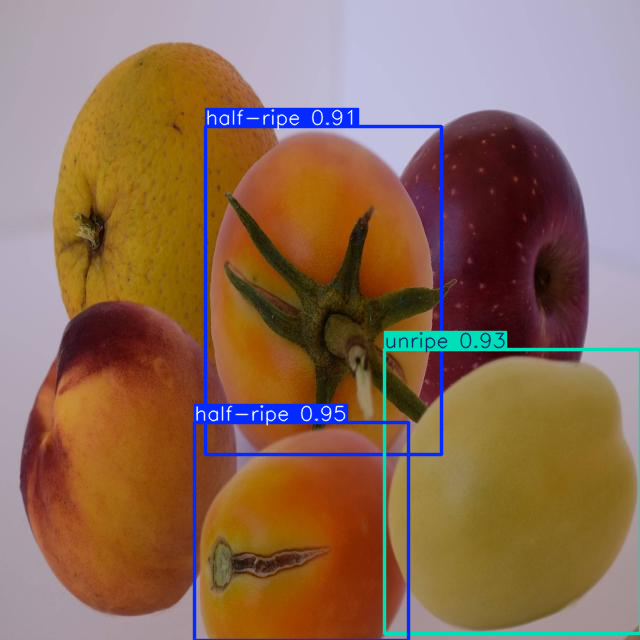

In [ ]:
import os
import cv2  # Import OpenCV for image processing
from ultralytics import YOLO

# Load a model
model = YOLO(os.path.join(ROOT_DIR, "Level2_train/detect/train/weights/best.pt"))
image_paths = ["/content/Smart-Fridge-9/test/images/Batch133_jpg.rf.1910542a6746e9fdc17969c73896f69e.jpg"]

# Process each image
processed_images = []
for image_path in image_paths:
    img = cv2.imread(image_path)  # Read the image using OpenCV
    processed_images.append(img)

# Run batched inference on the processed images
results = model(processed_images)

# Process results list
for result in results:
    boxes = result.boxes  # Boxes object for bounding box outputs
    masks = result.masks  # Masks object for segmentation masks outputs
    keypoints = result.keypoints  # Keypoints object for pose outputs
    probs = result.probs  # Probs object for classification outputs
    obb = result.obb  # Oriented boxes object for OBB outputs

    # Εκτύπωση των ονομάτων των κλάσεων που έχουν προβλεφθεί
    predicted_classes = [model.names[int(cls)] for cls in result.boxes.cls]
    print("Predicted classes:", predicted_classes)

    result.show()  # display to screen
    #result.save(filename="result.jpg")  # save to disk